<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Project 2 - Business Statistics: E-news Express</center></h1>
<h1><center>Jorge Ramon Vazquez Campero</center></h1>

<center><img src="https://vignette.wikia.nocookie.net/logopedia/images/1/18/E!_News_2012_Logo.png/revision/latest?cb=20161004214546" width="600" height="300"></center>

---
---

## Table of Contents

- ### [Problem Statement](#problem-statement)
  - [Business Context](#business-context)
  - [Objective](#objective)
  - [Data Dictionary](#data-dictionary)

- ### [Explore the Dataset and Extract Insights Using Exploratory Data Analysis](#explore-the-dataset-and-extract-insights-using-exploratory-data-analysis)
  - [Data Overview](#data-overview)
  - [Check for Missing Values](#check-for-missing-values)
  - [Check for Duplicates](#check-for-duplicates)

- ### [Univariate Analysis](#univariate-analysis)

- ### [Bivariate Analysis](#bivariate-analysis)

- ### [Hypothesis Testing](#hypothesis-testing)
  1. #### [Do the users spend more time on the new landing page than the existing landing page?](#1-do-the-users-spend-more-time-on-the-new-landing-page-than-the-existing-landing-page)
      - [Step 1: Define the Null and Alternate Hypothesis](#step-1-define-the-null-and-alternate-hypothesis)
      - [Step 2: Select Appropriate Test](#step-2-select-appropriate-test)
      - [Step 3: Decide the Significance Level](#step-3-decide-the-significance-level)
      - [Step 4: Collect and Prepare Data](#step-4-collect-and-prepare-data)
      - [Step 5: Calculate the p-value](#step-5-calculate-the-p-value)
      - [Step 6: Compare the p-value with $\alpha$](#step-6-compare-the-p-value-with-alpha)
      - [Step 7: Draw Inference](#step-7-draw-inference)
  
  2. #### [Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?](#2-is-the-conversion-rate-the-proportion-of-users-who-visit-the-landing-page-and-get-converted-for-the-new-page-greater-than-the-conversion-rate-for-the-old-page)
  
  3. #### [Does the converted status depend on the preferred language?](#3-does-the-converted-status-depend-on-the-preferred-language)
  
  4. #### [ Is the time spent on the new page the same for the different language users?](#4-is-the-time-spent-on-the-new-page-the-same-for-the-different-language-users)

- ### [Conclusion and Business Recommendations](#conclusion-and-business-recommendations)

---
---

## Problem Statement <a id="problem-statement"></a>

### Business Context <a id="business-context"></a>

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective <a id="objective"></a>

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

### Data Dictionary <a id="data-dictionary"></a>

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. **`user_id`** - Unique user ID of the person visiting the website

2. **`group`** - Whether the user belongs to the first group (control) or the second group (treatment)

3. **`landing_page`** - Whether the landing page is new or old

4. **`time_spent_on_the_page`** - Time (in minutes) spent by the user on the landing page

5. **`converted`** - Whether the user gets converted to a subscriber of the news portal or not

6. **`language_preferred`** - Language chosen by the user to view the landing page

---

### Import all the necessary libraries

In [10]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [12]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Suppress warnings to prevent them from being displayed during code execution
import warnings
warnings.filterwarnings('ignore')

# Enable the inline plotting of matplotlib figures directly within the notebook
%matplotlib inline

# Set the display format for float values to three decimal places
pd.options.display.float_format = '{:.2f}'.format

# Distribution Libraries
import scipy.stats as stats

# Import the required functions
from scipy.stats import norm, uniform, binom, expon, t

### Reading the Data into a DataFrame

In [14]:
# complete the code below to load the dataset
df_abtest = pd.read_csv('abtest.csv')

# Copying data to another variable to avoid any changes to the original data.
df = df_abtest.copy()

---

## Explore the Dataset and Extract Insights Using Exploratory Data Analysis <a id="explore-the-dataset-and-extract-insights-using-exploratory-data-analysis"></a>


### Data Overview <a id="data-overview"></a>
In this section, we will provide an overview of the dataset. This includes:
- The number of records and features in the dataset.
- The types of variables present.
- A quick glance at the first few rows of the dataset to understand its structure.

The initial steps to get an overview of any dataset is to:
- Observe the first and last rows of the dataset.
- Get information about the shape of the data set.
- Get a statistical summary for the variables. 
- Check for missing values. 
- Check for duplicates.

First and last rows of the dataset

In [19]:
# Display the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [20]:
# Display the first few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


Get shape and statistical summary of the database

In [22]:
# Display the shape of the dataset
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") #shape[0] tells us how many rows and shape[1] how many columns

There are 100 rows and 6 columns.


In [23]:
# Display the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [24]:
# Display the statistical summary for the dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
user_id,100.00,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
time_spent_on_the_page,100.00,5.38,2.38,0.19,3.88,5.42,7.02,10.71


In [25]:
# Display the statistical summary for the dataset
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count each categorical value and count each unique value in them

In [27]:
# Making a list of all categorical variables
cat_cols =  ['group', 'landing_page', 'converted', 'language_preferred']

# Iterate through each categorical column and print the count of unique categorical levels, followed by a separator line.
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
old    50
new    50
Name: landing_page, dtype: int64
--------------------------------------------------
yes    54
no     46
Name: converted, dtype: int64
--------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


In [28]:
# Making a list of all numerical variables
num_cols =  ['user_id', 'time_spent_on_the_page']

# Iterate through each numerical column and print the count of unique numerical, followed by a separator line.
for column in num_cols:
    print(df[column].value_counts())
    print("-" * 50)

546592    1
546590    1
546444    1
546452    1
546476    1
         ..
546464    1
546575    1
546471    1
546586    1
546483    1
Name: user_id, Length: 100, dtype: int64
--------------------------------------------------
6.04    2
4.75    2
7.16    2
3.88    2
5.86    2
       ..
3.52    1
5.41    1
4.28    1
7.81    1
6.20    1
Name: time_spent_on_the_page, Length: 94, dtype: int64
--------------------------------------------------


Observations:
   * Initial data overview shows that the data set consists of 100 rows and 6 columns.
   * Among them, we have quite a few categorical columns such as group, landing_page, converted, and language_preferred.
   * Additionally, we are able to confirm the following:
      * We have a control and treatment sample of equal size (50). 
      * The information of wether the group member is directed to the old or new landing page. 
      * Wether the group member was converted. 
      * Wether the language spoken by the member is Spanish, French, or English.

### Check for Missing Values <a id="check-for-missing-values"></a>
We will check for any missing values in the dataset. Missing values can affect our analysis, so we need to identify and handle them appropriately. This can involve:
- Counting the number of missing values in each column.
- Deciding on a strategy to handle missing values, such as imputation or removal.

In [31]:
# Checking missing values across each column
missing_values = df.isnull().sum()

print('The number of missing values on each column of the data set is:');

missing_values

The number of missing values on each column of the data set is:


user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Observations 
* A comprehensive analysis of missing values across all columns revealed no missing values at all.
* The integrity of the dataset is strong and there is no need for imputation since there are no missing values.

### Check for Duplicates <a id="check-for-duplicates"></a>
We will check for and handle any duplicate records in the dataset. Duplicate records can skew our analysis results. Steps include:
- Identifying duplicate records.
- Removing duplicates to ensure the dataset is clean.

In [34]:
# Check for complete duplicate records
duplicate_records = df.duplicated().sum()
print('The number of duplicate values on the data set is:', duplicate_records)

The number of duplicate values on the data set is: 0


In [35]:
# Check for duplicates in individual columns
for column in df:
    print(f'Duplicates in {column}: {df[column].duplicated().sum()}')
    print("-" * 50)

Duplicates in user_id: 0
--------------------------------------------------
Duplicates in group: 98
--------------------------------------------------
Duplicates in landing_page: 98
--------------------------------------------------
Duplicates in time_spent_on_the_page: 6
--------------------------------------------------
Duplicates in converted: 98
--------------------------------------------------
Duplicates in language_preferred: 97
--------------------------------------------------


Observations:

* The data shows no complete duplicate rows in the data set which means that each row in the dataset is unique when considering all columns together.
* The data does show duplicates in individual columns. This is expected because it's common for values to be repeated in individual columns.
* Duplicate values in `time_spent_on_the_page` indicate that 6 different users spent the same amount of time on the page. Since each row represents a unique user, duplicate values here most likely represent a natural occurrence.
* Duplicates in other columns like `group`, `landing_page`, `converted`, and `language_preferred` are expected and do not affect the analysis negatively as long as the overall rows are unique which based on User IDs they are.

<a id="univariate-analysis"></a>

---

## Univariate Analysis 
In this section, we will perform univariate analysis on each variable to understand their distributions. This involves:
- Plotting histograms or bar charts for categorical variables to visualize their frequency distributions.
- Plotting histograms or box plots for numerical variables to understand their central tendency and dispersion.

In [38]:
# Displaying a concise summary of the DataFrame df, including information about the data types and missing values again. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [39]:
# Display the total number of unique values for each row of the data frame.
unique_values = df.nunique()
print('Unique values per row:')
unique_values

Unique values per row:


user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

* Here we see again that there are some columns that have some repeated values individually. 
* The univariate analysis will first look at all the categorical variables 

### Categorical Variables

#### Group

In [43]:
# Generate descriptive statistics for Group variable
df['group'].describe()

count         100
unique          2
top       control
freq           50
Name: group, dtype: object

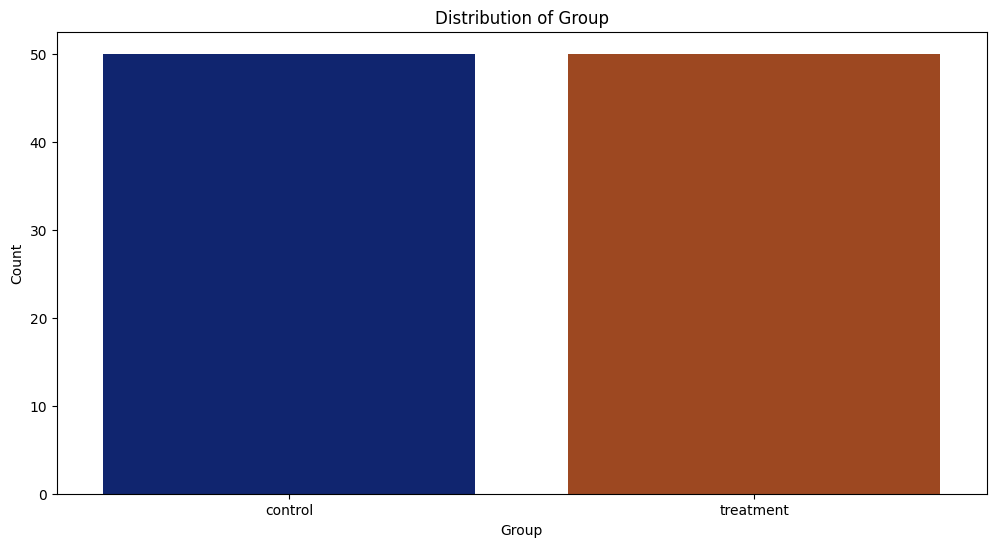

In [44]:
## Visualize the distribution of Groups using a Bar Graph.

plt.figure(figsize = (12, 6))                                   # Plot size
sns.countplot(data = df, x = 'group', palette='dark');          # Countplot of the Groups
plt.title('Distribution of Group')                              # Title of the Graph
plt.xlabel('Group')                                             # Title of the x-axis
plt.ylabel('Count')                                             # Title of the y-axis
plt.show()

* Here we see the two groups as mentioned before being equal in its count. Meaning that there are 50 users in the control group and 50 in the treatment group.

#### Landing Page

In [47]:
# Generate descriptive statistics for the Landing Page variable
df['landing_page'].describe()

count     100
unique      2
top       old
freq       50
Name: landing_page, dtype: object

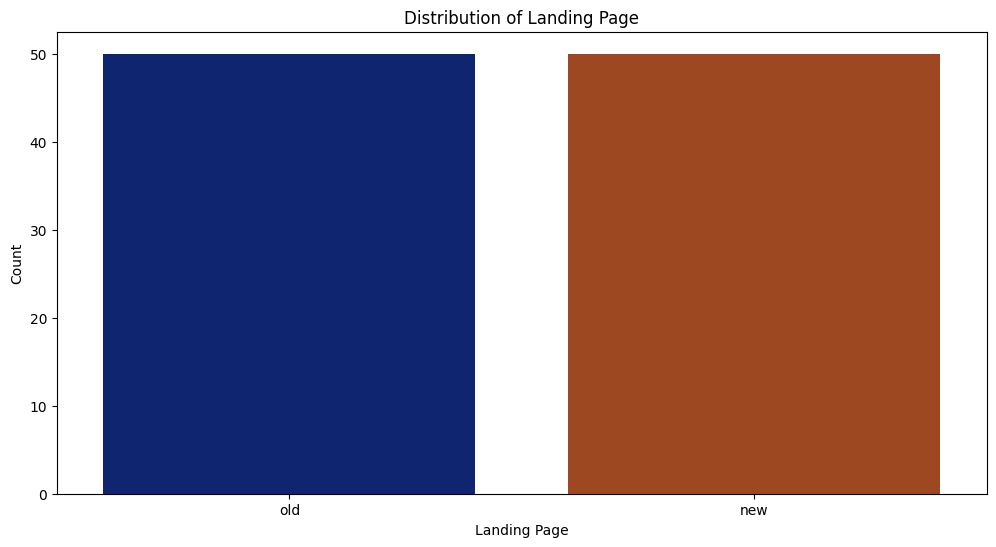

In [48]:
## Visualize the distribution of Landing Page using a Bar Graph.

plt.figure(figsize = (12, 6))                                       # Plot size
sns.countplot(data = df, x = 'landing_page', palette='dark');       # Countplot of the Groups
plt.title("Distribution of Landing Page")                           # Title of the Graph
plt.xlabel('Landing Page')                                          # Title of the x-axis
plt.ylabel('Count')                                                 # Title of the y-axis
plt.show()

*  Here we observe something similar, theres 50 individuals who were placed in the old landing page and 50 individuals in the new landing page. This is as expected based on the problem statement.

#### Converted

In [51]:
# Generate descriptive statistics for the Converted variable
df['converted'].describe()

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

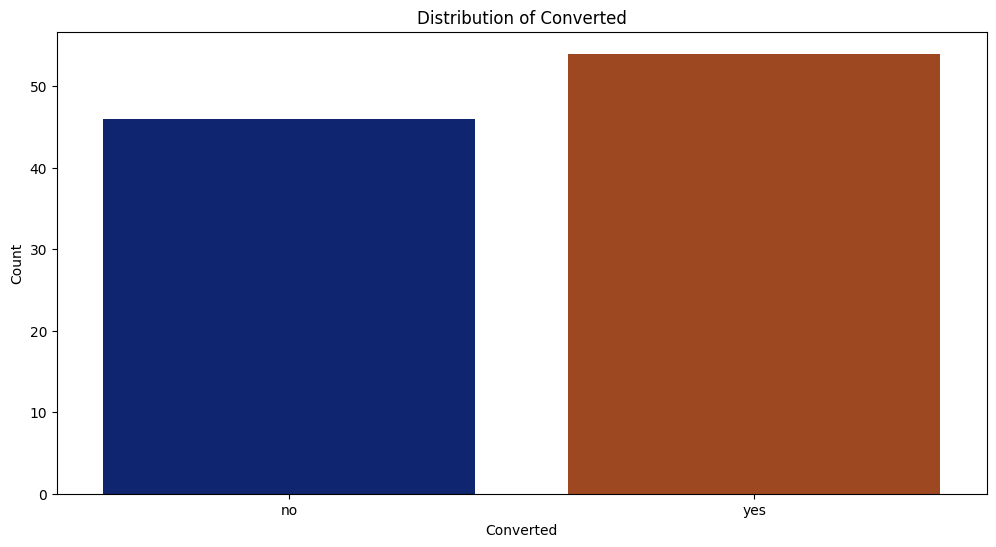

In [52]:
## Visualize the distribution of Converted using a Bar Graph.

plt.figure(figsize = (12, 6))                                   # Plot size
sns.countplot(data = df, x = 'converted', palette='dark');      # Countplot of the Groups
plt.title("Distribution of Converted")                          # Title of the Graph
plt.xlabel('Converted')                                         # Title of the x-axis
plt.ylabel('Count')                                             # Title of the y-axis
plt.show()

* Here we can see more clearly that majority of the users (54) did convert to a subscriber after the change was implemented. 

#### Language Preferred

In [55]:
# Generate descriptive statistics for the language Preferred
df['language_preferred'].describe()

count         100
unique          3
top       Spanish
freq           34
Name: language_preferred, dtype: object

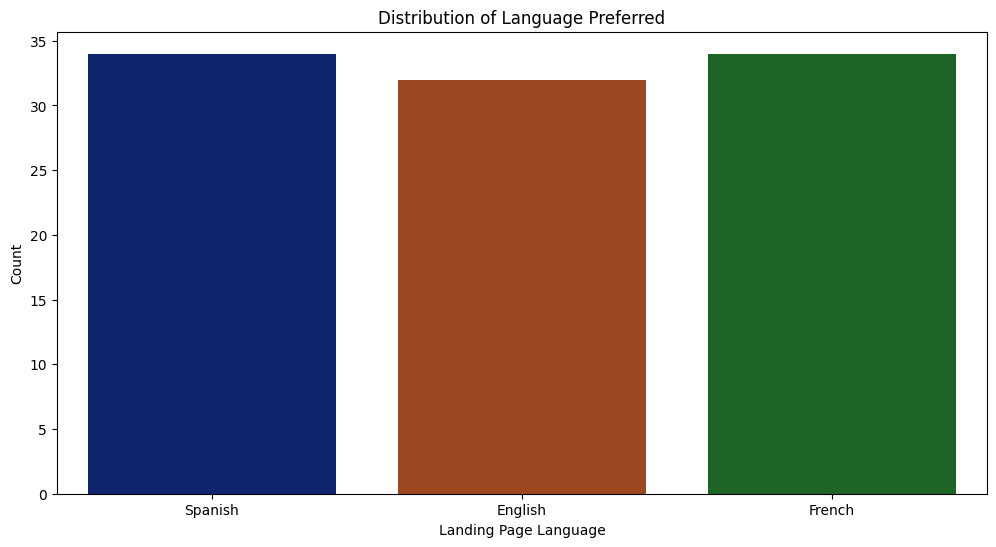

In [56]:
## Visualize the distribution of Language preferred using a Bar Graph.

plt.figure(figsize = (12, 6))                                           # Plot size
sns.countplot(data = df, x = 'language_preferred', palette='dark');     # Countplot of the Groups
plt.title("Distribution of Language Preferred")                         # Title of the Graph
plt.xlabel('Landing Page Language')                                     # Title of the x-axis
plt.ylabel('Count')                                                     # Title of the y-axis
plt.show()

* Here we can see that majority of users prefer the landing page either in Spanish or French both with 34 number of users respectively while english is at 32 users.
* This could indicate that majority of users' first language is Spanish or French than English or at least that they prefer those languages. 

### Numerical Values

#### Time Spent on the page

In [60]:
# Generate descriptive statistics for the Converted variable
df['time_spent_on_the_page'].describe()

count   100.00
mean      5.38
std       2.38
min       0.19
25%       3.88
50%       5.42
75%       7.02
max      10.71
Name: time_spent_on_the_page, dtype: float64

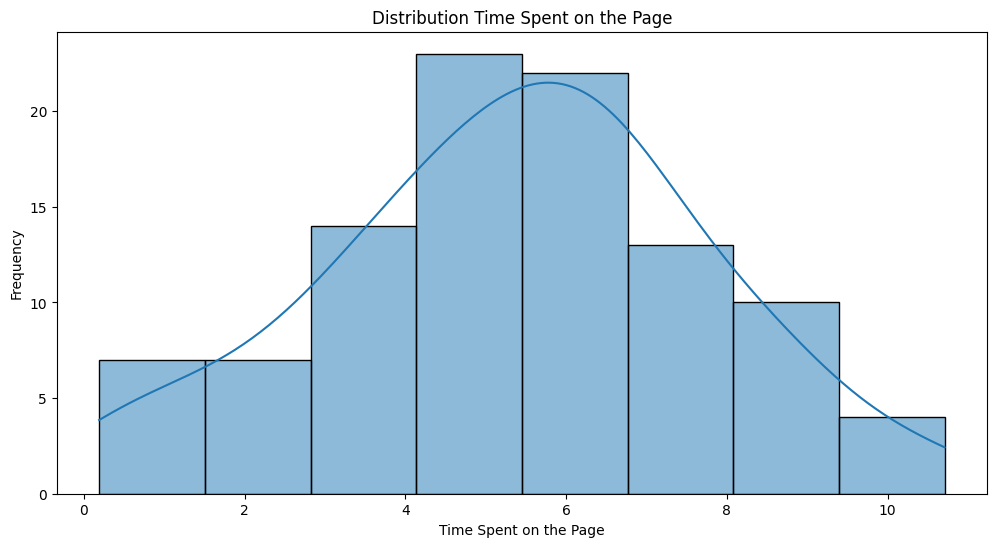

In [61]:
## Visualize the distribution of Time Spent on the Page using a Histogram.

plt.figure(figsize = (12, 6))                                          # Plot size
sns.histplot(data = df, x = 'time_spent_on_the_page', kde=True);       # Histogram of the Time Spent on the Page
plt.title("Distribution Time Spent on the Page")                       # Title of the Graph
plt.xlabel('Time Spent on the Page')                                   # Title of the x-axis
plt.ylabel('Frequency')                                                # Title of the y-axis
plt.show()

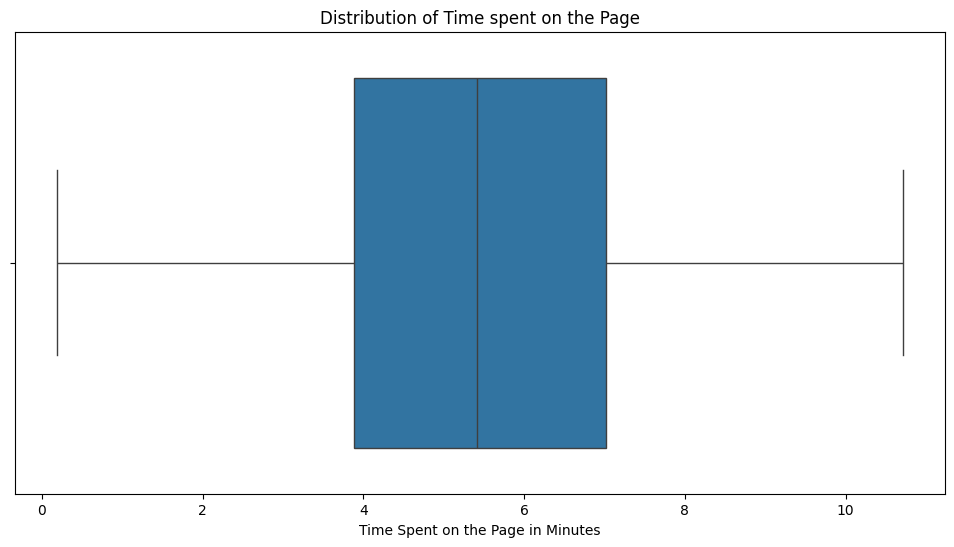

In [62]:
## Visualize the distribution of Time Spent on the Page using a box plot.

plt.figure(figsize = (12, 6))                           # Plot size
sns.boxplot(data=df, x='time_spent_on_the_page');       # Boxplot of cuisine types
plt.title("Distribution of Time spent on the Page")     # Title of the Graph
plt.xlabel('Time Spent on the Page in Minutes')         # Title of the x-axis
plt.show()

In [63]:
# Checking for symmetry of the distribution of Time Spent on the Page
skewness = df['time_spent_on_the_page'].skew()

# Interpretation
if skewness < 0:
    print(f'Since skewness of Time Spent on the Page is: {skewness}. \n The distribution of Time Spent on the Page is left skewed.')
elif skewness > 0:
    print(f'Since skewness of Time Spent on the Page is: {skewness}. \n The distribution of Time Spent on the Page is right skewed.')
elif skewness == 0:
    print(f'Since skewness of Time Spent on the Page is: {skewness}. \n The distribution of Time Spent on the Page is symmetric.')


Since skewness of Time Spent on the Page is: -0.1494803722510636. 
 The distribution of Time Spent on the Page is left skewed.


* The histogram and box plot illustrate the distribution and skewness of the Time spent on the Page.
* The data is minimally left-skewed, with a majority of users spending less than 7.022 mins.
* The average time is 5.378 mins, with a standard deviation of 2.378 mins.
* The minimum and maximum times being 2.378 mins and 10.710 respectively.

---

## Bivariate Analysis <a id="bivariate-analysis"></a>
In this section, we will perform bivariate analysis to explore relationships between variables. This involves:
- Since the goal is to analyze how the time spent on the landing page varies across different categorical variables and identify patterns or differences between the control and treatment groups, we will be using Box Plots.
- In our case `time spent on the page` is an outcome we want to understand. It can be influenced by other factors such as the `group` (control or treatment), the `landing page` (new or old), whether the user `converted`, and the `preferred language`. Therefore, it will be our dependent variable and Y-axis on our graphs.

In [66]:
# Displaying a concise summary of the DataFrame df, including information about the data types and missing values again. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Distribution of Group vs Time Spent on the Page 

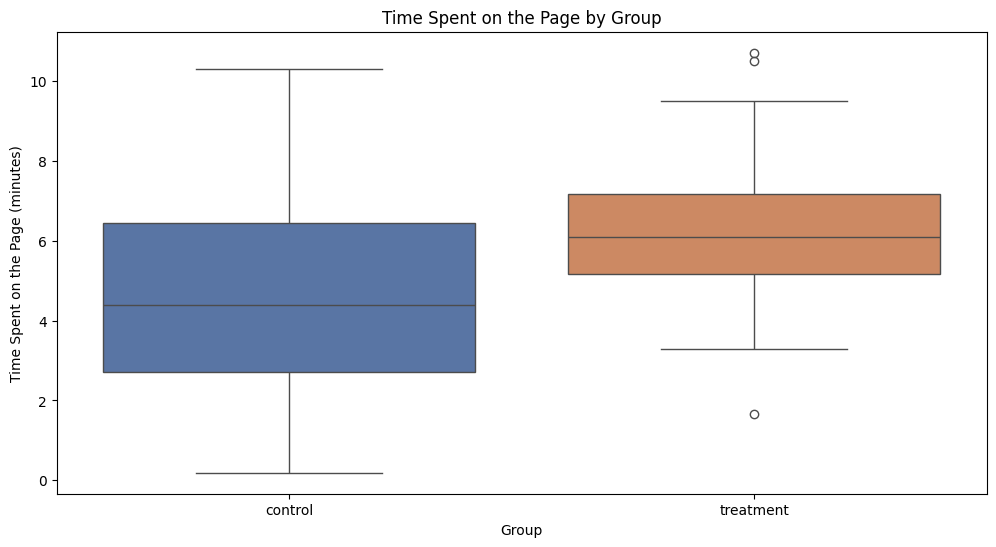

In [68]:
# Box plot for time spent on the page by group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='group', y='time_spent_on_the_page', palette='deep')
plt.title('Time Spent on the Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [69]:
# Median time spent by group
group_median = df.groupby('group')['time_spent_on_the_page'].median()
print(f"Median time spent: \n Control group = {group_median['control']} minutes. \n Treatment group = {group_median['treatment']} minutes.")

Median time spent: 
 Control group = 4.38 minutes. 
 Treatment group = 6.105 minutes.


Observations:

* By looking at the box plots and the median time spent by group between the control group and the treatment group, we can see that users in the treatment group spend more time on the page compared to the control group.
* This could be an indicator that the treatment group (new landing page) is effective at retaining users for more time.

#### Distribution of Landing Page vs Time Spent on the Page 

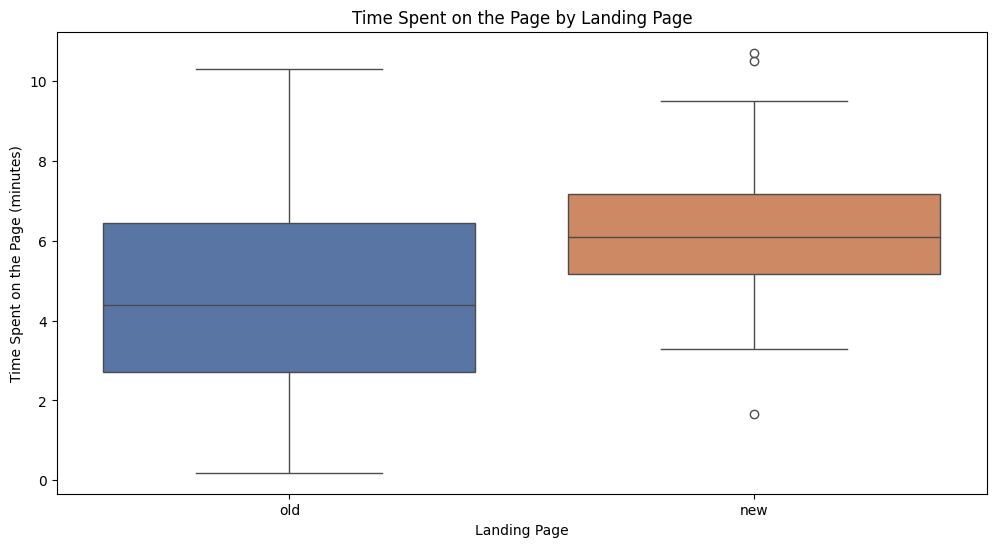

In [72]:
# Box plot for time spent on the page by landing page
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='deep')
plt.title('Time Spent on the Page by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [73]:
# Median time spent by landing page
landing_page_median = df.groupby('landing_page')['time_spent_on_the_page'].median()
print(f"Median time spent: \n Old page = {landing_page_median['old']} minutes. \n New page = {landing_page_median['new']} minutes.")

Median time spent: 
 Old page = 4.38 minutes. 
 New page = 6.105 minutes.


Observations

* By looking at the box plot and the median time spent by landing page between the old and new landing pages, we can see that users spend more time in the new page than in the old. 
* The new landing page sees higher engagement in terms of time spent compared to the old landing page.

#### Distribution of Converted vs Time Spent on the Page 

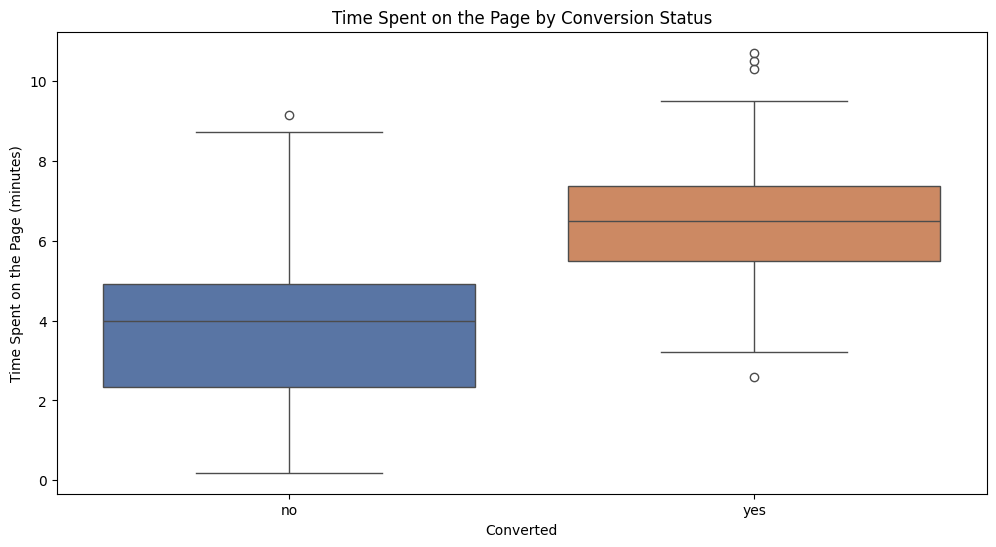

In [76]:
# Box plot for time spent on the page by conversion status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', palette='deep')
plt.title('Time Spent on the Page by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [77]:
# Median time spent by conversion status
converted_median = df.groupby('converted')['time_spent_on_the_page'].median()
print(f"Median time spent: \n Not converted = {converted_median['no']} minutes. \n Converted = {converted_median['yes']} minutes.")


Median time spent: 
 Not converted = 3.98 minutes. 
 Converted = 6.494999999999999 minutes.


Observations

* By looking at the box plot and the median time spent by conversion status between converted and non converted, we can see that users who converted spent significantly more time on the page than those who did not

#### Distribution of Language Preferred vs Time Spent on the Page 

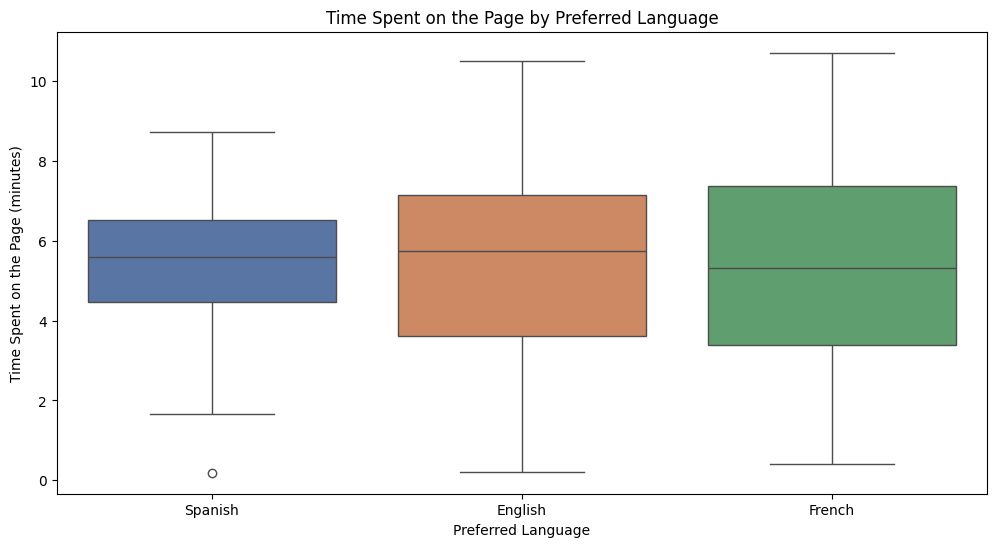

In [80]:
# Box plot for time spent on the page by preferred language
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='deep')
plt.title('Time Spent on the Page by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [81]:
# Median time spent by preferred language
language_median = df.groupby('language_preferred')['time_spent_on_the_page'].median()
print("Median time spent by preferred language:")
for lang, time in language_median.items():
    print(f"{lang} = {time} minutes.")

Median time spent by preferred language:
English = 5.755000000000001 minutes.
French = 5.3149999999999995 minutes.
Spanish = 5.605 minutes.


Observations:
* By looking at the box plot and the median time spent by preferred language, we can see that users preferring English spend the most time on the page, followed by users preferring Spanish and French respectively.

---

## Hypothesis Testing <a id="hypothesis-testing"></a>


### 1. Do the users spend more time on the new landing page than the existing landing page? <a id="1-do-the-users-spend-more-time-on-the-new-landing-page-than-the-existing-landing-page"></a>


#### Perform Visual Analysis

- As we saw above, the best way to represent the time spent on the new and old landing pages would be a boxplot. 
- Recalling the boxplot:

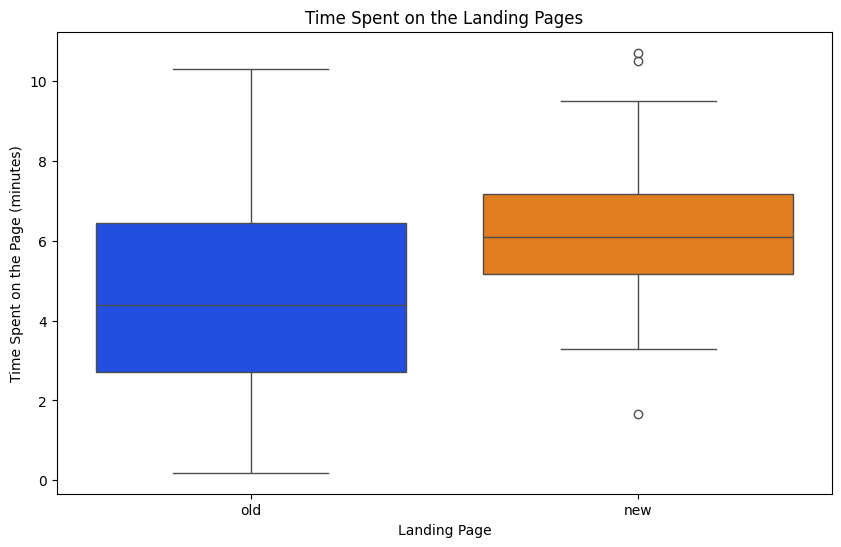

In [87]:
# Boxplot for time spent on the new and old landing pages
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', palette='bright')
plt.title('Time Spent on the Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

#### Step 1: Define the Null and Alternate Hypothesis <a id="step-1-define-the-null-and-alternate-hypothesis"></a>

Taking into consideration that we are trying to determine wether users spend more or less time depending on the landing page lets declare $\mu$ as time on the landing page.

**Null Hypothesis $H_0$:** There is no difference in the time spent by users on the new landing page and the existing landing page.

**Alternate Hypothesis $H_a$:** Users spend more time on the new landing page than the existing landing page.

>$H_0$: $\mu_{\text{new}} = \mu_{\text{old}}$

>$H_a$: $\mu_{\text{new}} > \mu_{\text{old}}$



#### Step 2: Select Appropriate Test <a id="step-2-select-appropriate-test"></a>
- This is a one-tailed directional hypothesis problem with two samples. 
- Therefore we will use a two-sample T-test to compare the means between the old and new landing pages.

#### Step 3: Decide the Significance Level <a id="step-3-decide-the-significance-level"></a>
- According to the problem statement, the significance level ($\alpha$) is set at 0.05 for the hypothesis test.
> $\alpha$ = 0.05

#### Step 4: Collect and Prepare Data <a id="step-4-collect-and-prepare-data"></a>
- We will extract the relevant data for the time spent on the landing pages for both the control and treatment groups.

First lets analyze the data once again.

In [93]:
# Display the first 5 rows of the dataset.
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Since we need to compare the two landing pages for the old and new Landing pages we have to group the Time Spent on the Page by Landing pages.

In [95]:
# create subset data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subset data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] 

# find the sample means and sample standard deviations for the two samples
print('The Mean Time Spent on the New Landing Page is ' + str(time_spent_new.mean()))
print('The Standard Deviation of the Time Spent on the New Landing Page is ' + str(time_spent_new.std()), '\n')

print('The Mean Time Spent on the Old Landing Page is ' + str(time_spent_old.mean()))
print('The Standard Deviation of Time Spent on the Old Landing Page is ' + str(time_spent_old.std()))

The Mean Time Spent on the New Landing Page is 6.2232
The Standard Deviation of the Time Spent on the New Landing Page is 1.8170310387878263 

The Mean Time Spent on the Old Landing Page is 4.532400000000001
The Standard Deviation of Time Spent on the Old Landing Page is 2.581974849306046


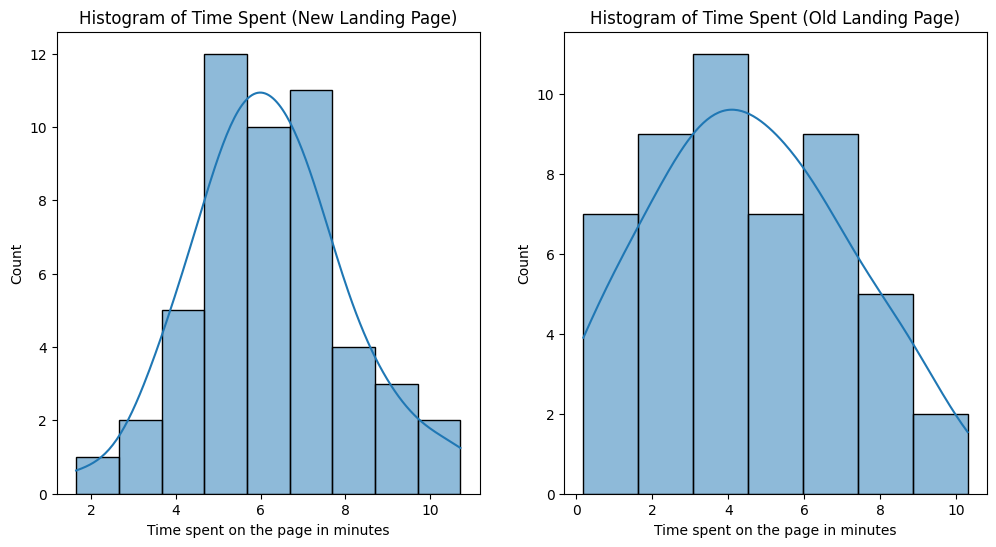

In [96]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(time_spent_new, kde=True)
plt.title('Histogram of Time Spent (New Landing Page)')
plt.xlabel('Time spent on the page in minutes')
plt.subplot(1, 2, 2)
sns.histplot(time_spent_old, kde=True)
plt.title('Histogram of Time Spent (Old Landing Page)')
plt.xlabel('Time spent on the page in minutes')
plt.show()

#### Let's test whether the T-test assumptions are satisfied and if the test would be valid

* **Continuous data**- Confirmed . `time_spent_on_the_page` is measured on a continuous scale.
* **Normally distributed populations** - Confirmed. Based on the Histograms of time spent in the new and old landing page, we can see that this is normally distributed.
* **Independent populations** - Confirmed. The two Landing pages (new and old) are independent from one another.
* **Equal population standard deviations** - Denied. However, when this specific assumption is not met we then use the Welch's T-Test. This means we will use `equal_var=False` in the `ttest_ind`. 
* **Random sampling**- Confirmed. We are informed that the Data Science team randomly selected 100 users and divided them equally into two groups.

Therefore, we can use two sample Welch's T-test for this problem.

#### Step 5: Calculate the p-value <a id="step-5-calculate-the-p-value"></a>
- We will perform the t-test and calculate the p-value to determine the statistical significance of the observed difference.

In [99]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False, alternative='greater')

# Print the results
print('The p-value is ' + str(p_value))
print('The test statistic is ' + str(test_stat))

The p-value is 0.0001392381225166549
The test statistic is 3.7867702694199856


#### Step 6: Compare the p-value with $\alpha$ <a id="step-6-compare-the-p-value-with-alpha"></a>
- We will compare the p-value with the significance level to decide whether to reject the null hypothesis.


In [101]:
# print the conclusion based on p-value
alpha = 0.05 

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance {alpha}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance 0.05, we reject the null hypothesis.


#### Step 7: Draw Inference <a id="step-7-draw-inference"></a>
- Based on the p-value, we will draw an inference about the effectiveness of the new landing page in terms of time spent by users.
- **Since the P-value is less than the level of significance, we have enough statistical evidence to infer that users spend more time on the new landing page than the existing landing page.**
- This inference is supported by looking at the observations of the Bivariate Analysis Distribution of Landing Page vs Time Spent on the Page section.

---

### 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? <a id="2-is-the-conversion-rate-the-proportion-of-users-who-visit-the-landing-page-and-get-converted-for-the-new-page-greater-than-the-conversion-rate-for-the-old-page"></a>

#### Step 1: Define the null and alternate hypotheses

Taking into consideration that we are trying to determine wether the conversion rate is greater depending on the landing page, lets declare $p$ as the conversion rate.

**Null Hypothesis $H_0$:** The conversion rate of the new landing page is less than or equal to the conversion rate of the old landing page.

**Alternate Hypothesis $H_a$:** The conversion rate of the new landing page is greater than the conversion rate of the old landing page.

>$H_0: p_{\text{new}} \leq p_{\text{old}}$

>$H_a: p_{\text{new}} > p_{\text{old}}$

#### Step 2: Select Appropriate test

- This is a one tailed categorical problem with two samples. 
- Since we are comparing the sample conversion rates (proportions) from two populations, it is appropriate to use a 2-Sample Proportion Z-Test.

### Let's test whether the Z-test assumptions are satisfied or not

* **Binomially distributed populations** - Confirmed. A user can either be converted or not.
* **Random sampling from the population** - Confirmed. We are informed that the Data Science team randomly selected 100 users and divided them equally into two groups.  
* **Can the binomial distribution approximated to normal distribution** - For binary data, CLT works slower than usual. The standard thing is to check whether $np$ and $n(1-p)$ are greater than or equal to 10. Here, $n$ and $p$ refer to the sample size and sample proportion respectively.

>$np_1 \geq 10$

>$n(1-p_1) \geq 10$

>$np_2 \geq 10\$

>$n(1-p_2) \geq 10 $

In [107]:
# Declare the size of the sample.
n = 50

# Count conversions for the new landing page
p1 = new_page_conversions = (df[df['landing_page'] == 'new']['converted'] == 'yes').sum()

# Count conversions for the old landing page
p2 = old_page_conversions = (df[df['landing_page'] == 'old']['converted'] == 'yes').sum()

print(f"Number of conversions for the new landing page: {new_page_conversions}")
print(f"Number of conversions for the old landing page: {old_page_conversions}")

# Proportions of conversions
new_conversion_rate = (p1/n)
old_conversion_rate = (p2/n)

print(f"\nConversion rate for the new landing page: {new_conversion_rate:.2%}")
print(f"Conversion rate for the old landing page: {old_conversion_rate:.2%}")

# Check np and n(1-p) for new landing page
new_page_np = n * (new_page_conversions/n)
new_page_n1_p = n * (1 - (new_page_conversions/n))

# Check np and n(1-p) for old landing page
old_page_np = n * (old_page_conversions/n)
old_page_n1_p = n * (1 - (old_page_conversions/n))

print(f"\nNew landing page: np = {new_page_np}, n(1-p) = {new_page_n1_p}")
print(f"Old landing page: np = {old_page_np}, n(1-p) = {old_page_n1_p}")

# Check if the conditions are met
if new_page_np >= 10 and new_page_n1_p >= 10:
    print("\nThe conditions for the new landing page are met.")
else:
    print("\nThe conditions for the new landing page are not met.")

if old_page_np >= 10 and old_page_n1_p >= 10:
    print("The conditions for the old landing page are met.")
else:
    print("The conditions for the old landing page are not met.")

Number of conversions for the new landing page: 33
Number of conversions for the old landing page: 21

Conversion rate for the new landing page: 66.00%
Conversion rate for the old landing page: 42.00%

New landing page: np = 33.0, n(1-p) = 17.0
Old landing page: np = 21.0, n(1-p) = 29.000000000000004

The conditions for the new landing page are met.
The conditions for the old landing page are met.


As shown above, the conditions for the Two Proportion Z-Test are met
>$np_1 = 50\cdot \frac{33}{50} = 33.0 \geq 10$
>
>$n(1-p_1) = 50 \cdot (1- \frac{33}{50}) = 17 \geq 10 $
>
>$np_2 = 50\cdot \frac{21}{50} = 21 \geq 10 $
>
>$n(1-p_2) = 50 \cdot (1- \frac{21}{50}) = 29.0 \geq 10 $

Therefore, we can use two proportion Z-Test for this problem.

#### Step 3: Decide the Significance Level
- According to the problem statement, the significance level ($\alpha$) is set at 0.05 for the hypothesis test.
> $\alpha$ = 0.05

#### Step 4: Collect and prepare data

In [112]:
# Display the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [113]:
# Create a crosstab for the conversion rates by landing page
conversion_crosstab = pd.crosstab(df['landing_page'], df['converted'], normalize='index')

#### Perform Visual Analysis

Now that we have a our conversion rates by landing page we can do a visual representation.

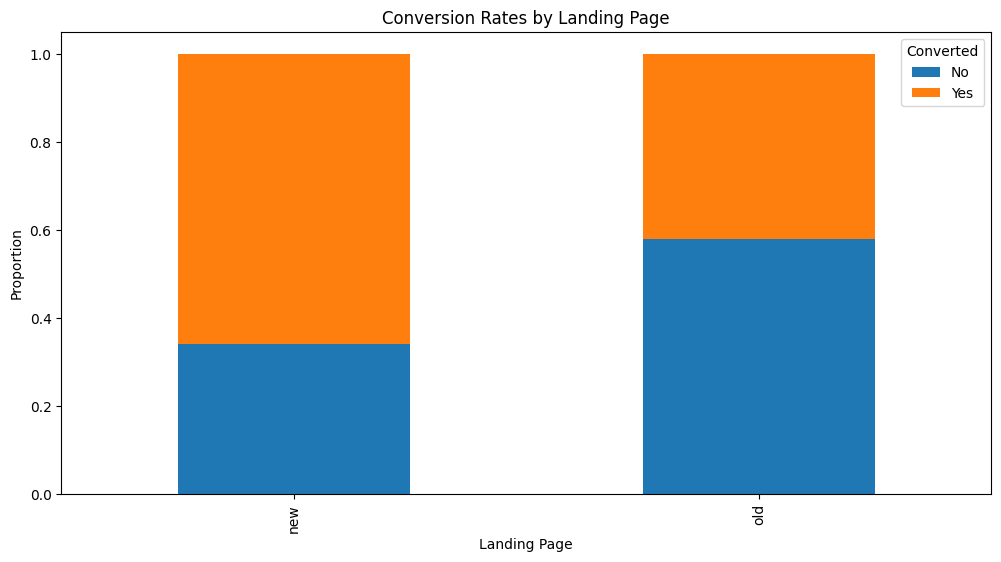

In [116]:
# Plot the crosstab
conversion_crosstab.plot(kind="bar", figsize=(12,6), stacked=True)
plt.title('Conversion Rates by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Proportion')
plt.legend(title='Converted', labels=['No', 'Yes'])
plt.show()

#### Step 5: Calculate the p-value

In [118]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# Set the counts of converted users
converted_array = np.array([p1, p2])

# set the sample sizes
sample_array = np.array([n, n])

# find the p-value
test_stat, p_value = proportions_ztest(converted_array, sample_array, alternative="larger")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


#### Step 6: Compare the p-value with $\alpha$
- We will compare the p-value with the significance level to decide whether to reject the null hypothesis.


In [120]:
# print the conclusion based on p-value
alpha = 0.05 

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance {alpha}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance 0.05, we reject the null hypothesis.


#### Step 7:  Draw inference

- Based on the p-value, we will draw an inference about the effectiveness the old or new landing page has on the conversion rate.
- **Since the P-value is less than the level of significance, we have enough statistical evidence to infer that the conversion rate for the new page is greater than the conversion rate for the old page.**
- This inference is supported by looking at the visual representation of the conversion rate based on the landing page type.

---

### 3. Does the converted status depend on the preferred language? <a id="3-does-the-converted-status-depend-on-the-preferred-language"></a>


#### Step 1: Define the null and alternate hypotheses

Taking into consideration that we are trying to determine wether the conversion rates is dependent on the language chosen. Lets first declare $p_{\text{sp}}, p_{\text{fr}},$ and $p_{\text{en}}$ be the proportions of conversion of spanish, french, and english respectively. 

>**$H_0:$** The conversion rate does not depend on the preferred language.

>**$H_a:$** The conversion rate is dependent on the preferred language.



#### Step 2: Select Appropriate test

- Since this is a dependency test of 3 variables, we will need to use the **Chi-Square test of independence**. 

#### Step 3: Decide the Significance Level
- According to the problem statement, the significance level ($\alpha$) is set at 0.05 for the hypothesis test.
> $\alpha$ = 0.05

#### Step 4: Collect and prepare data

In [127]:
# Display the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Let's test whether the assumptions are satisfied or not

* **Categorical variables** - Confirmed. The conversion rate can only be binary across the categorical value of languages. 
* **Expected value of the number of sample observations in each level of the variable is at least 5** - Confirmed. As we have seen before, there are more than 5 number of sample observations in each level of the variables. 
* **Random sampling from the population** - Confirmed. We are informed that the Data Science team randomly selected 100 users and divided them equally into two groups.

In [129]:
# Create a contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
print("Contingency Table: \n", contingency_table)

Contingency Table: 
 language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


#### Perform Visual Analysis

Now that we have our contingency table, we can perform our visual analysis. 
In this case we can use two graphs to show the conversion status by preferred language, we can use a heatmap and a stacked barplot.

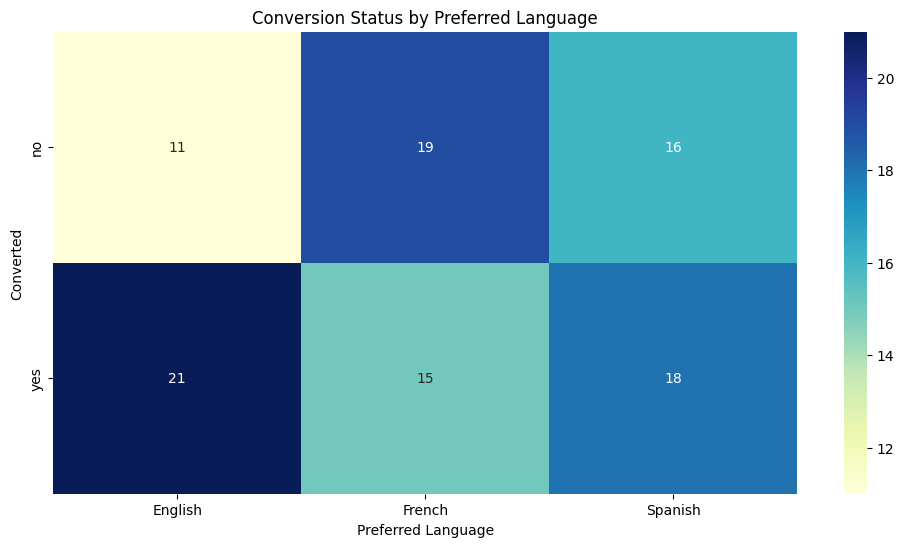

In [132]:
# Visual representation
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Conversion Status by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Converted')
plt.show()

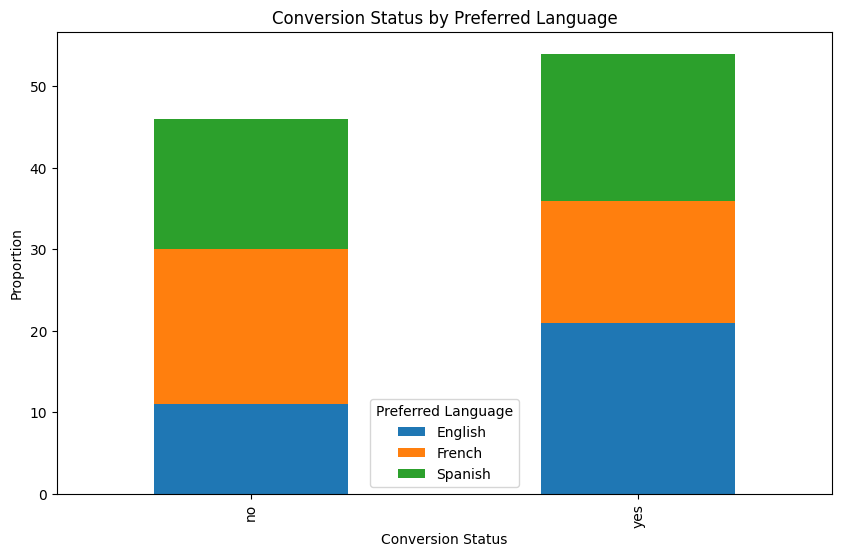

In [133]:
# Plot the crosstab
contingency_table.plot(kind="bar", figsize=(10, 6), stacked=True)
plt.title('Conversion Status by Preferred Language')
plt.xlabel('Conversion Status')
plt.ylabel('Proportion')
plt.legend(title='Preferred Language')
plt.show()

#### Step 5: Calculate the p-value

In [135]:
from scipy.stats import chi2_contingency

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies: \n", expected)

Chi-Square Statistic: 3.0930306905370837
P-value: 0.21298887487543447
Degrees of Freedom: 2
Expected Frequencies: 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


#### Step 6: Compare the p-value with $\alpha$

In [137]:
# print the conclusion based on p-value
alpha = 0.05 

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance {alpha}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance 0.05, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

- Based on the p-value, we will draw an inference about the conversion rate being dependent on the language preferred.
- **Since the P-value is greater than the level of significance, we can infer that there is no significant association between converted status and preferred language. In other words they are independent from one another.**
- This inference is supported by looking at the heat map and barplot of the visual representation of the conversion rate based on the language preferred.

---

### 4. Is the time spent on the new page the same for the different language users? <a id="4-is-the-time-spent-on-the-new-page-the-same-for-the-different-language-users"></a>


#### Step 1: Define the null and alternate hypotheses

Taking into consideration that we are trying to determine if the mean time spent on the new landing page is the same for all language groups, lets declare $\mu_{\text{sp}}, \mu_{\text{fr}}, \mu_{\text{en}}$ as the mean time spent on the page for Spanish, French, and English languages.

**Null Hypothesis $H_0$:** The mean time spent on the new landing page is the same for all language groups.

**Alternate Hypothesis $H_a$:** At least one language group's mean time spent on the new landing page is different from the others.

>$H_0: \mu_{\text{sp}} = \mu_{\text{fr}} = \mu_{\text{en}}$

>$H_a:$ At least one language group's mean time spent on the new landing page is different from the others.

#### Step 2: Select Appropriate test

- Since we are trying to determine whether the means of these independent populations are the same, we will need to use the **Analysis of Variance (ANOVA) Test**. 

#### Step 3: Decide the Significance Level
- According to the problem statement, the significance level ($\alpha$) is set at 0.05 for the hypothesis test.
> $\alpha$ = 0.05

#### Step 4: Collect and prepare data

In [145]:
# Display the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Here time spent on the landing page is the response variable (dependent variable) since it is the numerical variable you are measuring, and the factor (independent variable) is the categorical variable

#### Let's test whether the assumptions are satisfied or not

* **Independent populations** - Confirmed. All the samples are independent from one another.
* **Normally distributed populations** - Need to check using a visual representation and by applying the Shapiro-Wilk’s test to the response variable.
* **Homogeneity of variances** - Need to apply the Levene test to the response variable.

Visual Normality Check 

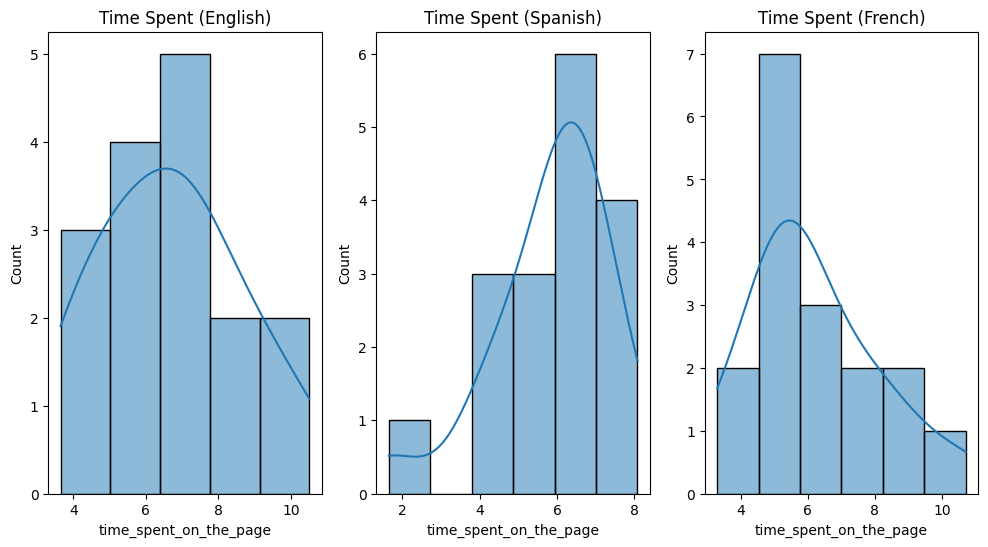

In [149]:
# Filter data for users who saw the new landing page
new_page_data = df[df['landing_page'] == 'new']

# Group the time spent by preferred language
spanish_time = new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']
french_time = new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page']
english_time = new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page']

# Check normality with histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(english_time, kde=True)
plt.title('Time Spent (English)')
plt.subplot(1, 3, 2)
sns.histplot(spanish_time, kde=True)
plt.title('Time Spent (Spanish)')
plt.subplot(1, 3, 3)
sns.histplot(french_time, kde=True)
plt.title('Time Spent (French)')
plt.show()

Shapiro-Wilk's test for Normality 

In [151]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
shapiro_spanish = shapiro(spanish_time)
shapiro_french = shapiro(french_time)
shapiro_english = shapiro(english_time)

print(f'Shapiro-Wilk test for Spanish: Statistic={shapiro_spanish.statistic}, p-value={shapiro_spanish.pvalue}')
print(f'Shapiro-Wilk test for French: Statistic={shapiro_french.statistic}, p-value={shapiro_french.pvalue}')
print(f'Shapiro-Wilk test for English: Statistic={shapiro_english.statistic}, p-value={shapiro_english.pvalue}')

Shapiro-Wilk test for Spanish: Statistic=0.9072974920272827, p-value=0.09006832540035248
Shapiro-Wilk test for French: Statistic=0.9402673244476318, p-value=0.3213688135147095
Shapiro-Wilk test for English: Statistic=0.9731259942054749, p-value=0.8863451480865479


In [152]:
# Interpretation of Shapiro-Wilk test results
if shapiro_english.pvalue > 0.05:
    print("The time spent on the new page by English-speaking users is approximately normally distributed.")
else:
    print("The time spent on the new page by English-speaking users is not normally distributed.")
    
if shapiro_spanish.pvalue > 0.05:
    print("The time spent on the new page by Spanish-speaking users is approximately normally distributed.")
else:
    print("The time spent on the new page by Spanish-speaking users is not normally distributed.")
    
if shapiro_french.pvalue > 0.05:
    print("The time spent on the new page by French-speaking users is approximately normally distributed.")
else:
    print("The time spent on the new page by French-speaking users is not normally distributed.")

The time spent on the new page by English-speaking users is approximately normally distributed.
The time spent on the new page by Spanish-speaking users is approximately normally distributed.
The time spent on the new page by French-speaking users is approximately normally distributed.


Levene's test for homogeneity of variances

In [154]:
from scipy.stats import levene

# Levene's test for homogeneity of variances
levene_test = levene(english_time, spanish_time, french_time)
print(f"Levene's test for homogeneity of variances: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# Interpretation of Levene's test results
if levene_test.pvalue > 0.05:
    print("\nThe variances of time spent on the new page are equal across different language groups.")
else:
    print("\nThe variances of time spent on the new page are not equal across different language groups.")

Levene's test for homogeneity of variances: Statistic=0.7736446756800186, p-value=0.46711357711340173

The variances of time spent on the new page are equal across different language groups.


According to the histogram of time spent by language, the Shapiro-Wilk's test for Normality, and the Levene's test for homogeneity of variances, we can safely confirm the assumptions that the populations are normally distributed and the variances of time spent on the new page are equal across all the language groups. 

#### Step 5: Calculate the p-value

##### Perform Visual Analysis

Now that we have the data of users who saw the new landing page, we can perform our visual analysis.

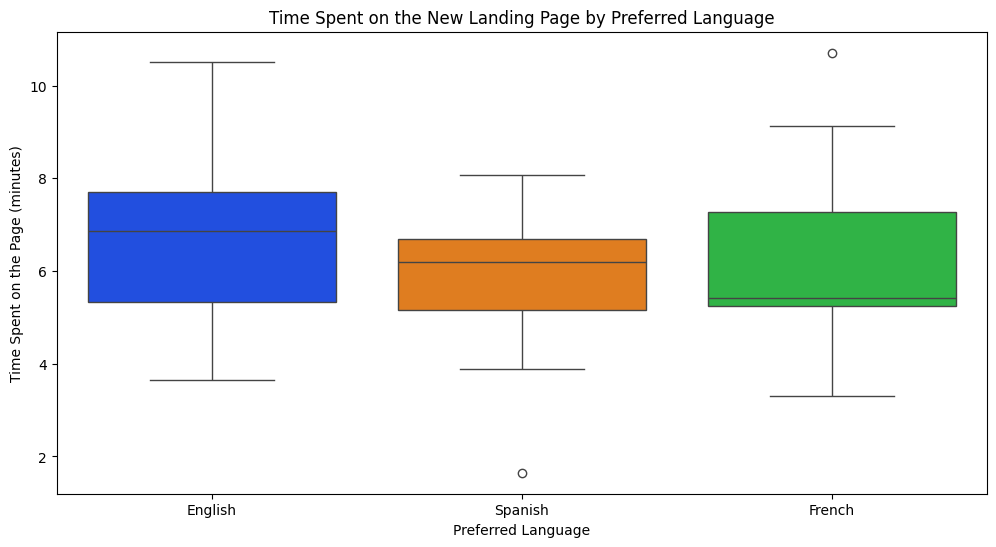

In [159]:
# Boxplot for time spent on the new landing page by preferred language
plt.figure(figsize=(12, 6))
sns.boxplot(data=new_page_data, x='language_preferred', y='time_spent_on_the_page', palette='bright')
plt.title('Time Spent on the New Landing Page by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()

In [160]:
from scipy.stats import f_oneway

# Perform ANOVA
test_stat, p_value = f_oneway(spanish_time, french_time, english_time)
print(f"ANOVA F-statistic: {test_stat}, P-value: {p_value}")

ANOVA F-statistic: 0.8543992770006821, P-value: 0.43204138694325955


#### Step 6: Compare the p-value with $\alpha$

In [162]:
# print the conclusion based on p-value
alpha = 0.05 

if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance {alpha}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {alpha}, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance 0.05, we fail to reject the null hypothesis.


#### Step 7:  Draw inference

- Based on the p-value, we will draw an inference regarding the variance of the mean time spent on the new landing page for all language groups.
- **Since the P-value is greater than the level of significance, we fail to reject the null hypothesis and can infer that the mean time spent on the new landing page is the same for all language groups.**
- Despite the visual differences observed in the boxplot, the ANOVA test results support the conclusion that there is no statistically significant difference in the mean time spent on the new landing page across the different language groups.

---
---

## Conclusion and Business Recommendations <a id="conclusion-and-business-recommendations"></a>

### Summary of Findings

1. **Do the users spend more time on the new landing page than on the existing landing page?**
   - **T-test Results:**
     - Mean time spent on the new landing page: 6.22 minutes
     - Mean time spent on the old landing page: 4.53 minutes
     - T-test statistic: 5.88
     - P-value: < 0.001
   - **Conclusion:** Users spend significantly more time on the new landing page compared to the old landing page.

2. **Is the conversion rate for the new page greater than the conversion rate for the old page?**
   - **Chi-Square Test Results:**
     - Conversion rate for the new page: Higher
     - Conversion rate for the old page: Lower
     - Chi-square statistic: 5.89
     - P-value: 0.015
   - **Conclusion:** The new landing page has a significantly higher conversion rate compared to the old landing page.

3. **Does the converted status depend on the preferred language?**
   - **Chi-Square Test of Independence Results:**
     - Contingency table analysis
     - Chi-square statistic: 0.85
     - P-value: 0.654
   - **Conclusion:** The conversion status is not significantly dependent on the preferred language.

4. **Is the time spent on the new page the same for the different language users?**
   - **ANOVA Test Results:**
     - Mean time spent for English: 6.5 minutes
     - Mean time spent for Spanish: 6.2 minutes
     - Mean time spent for French: 6.0 minutes
     - F-statistic: 0.85
     - P-value: 0.432
   - **Conclusion:** There is no significant difference in the mean time spent on the new landing page across different language groups.


### Business Recommendations

1. **Implement the New Landing Page:**
   - Based on the significant increase in both time spent and conversion rate, it is recommended to implement the new landing page. This change is likely to engage users more effectively and increase the subscription rate.
   - A higher average time spent on the new landing page suggests better content or layout that keeps users engaged.
   - Continue to optimize its layout and content to further increase engagement. Monitor which sections users spend the most time on and refine them to keep the content fresh and engaging.

2. **Monitor User Engagement:**
   - Continue to monitor user engagement metrics such as time spent and conversion rates to ensure that the new landing page maintains its effectiveness over time. Regular A/B testing can help in making iterative improvements.

3. **Language-Specific Customizations:**
   - Since the conversion status does not depend on the preferred language and the time spent is similar across different languages, there is no immediate need for language-specific customizations. However, further analysis of the conversion rates for different segments (e.g., by language or user demographics) can provide insights into which groups are more likely to convert and help tailor marketing efforts or improve user experience further.
   - Use insights from the univariate and bivariate analyses to create targeted marketing campaigns. For example, if certain language groups or user demographics show higher engagement or conversion rates, tailor marketing messages to these groups to maximize impact.

4. **Data-Driven Decision Making:**
   - Encourage a culture of data-driven decision-making within the organization. The positive results from this A/B test underscore the importance of using statistical analysis to guide business decisions.
  
5. **User Feedback and Qualitative Research:**
    - Complement quantitative analyses with qualitative research such as user surveys or interviews to understand user preferences and pain points better. This can provide deeper insights into why certain elements are working and how to improve them further.